In [1]:
from graphviz import Digraph

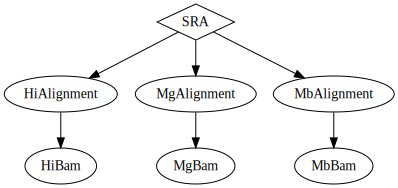

In [36]:
dot = Digraph(comment="NCBI Remap Project Workflow", filename='../../output/basic_workflow.svg', format='svg')
dot.node('SRA', shape='diamond')


hi = Digraph('Hisat2')
hi.body.append('style=filled')
hi.body.append('color=lightgrey')
hi.edges([
        ('HiAlignment', 'HiBam')
    ])

mg = Digraph('Magic')
mg.body.append('style=filled')
mg.body.append('color=lightblue')
mg.edges([
        ('MgAlignment', 'MgBam')
    ])

mb = Digraph('Magic Blast')
mb.body.append('style=filled')
mb.body.append('color=lightgreen')
mb.edges([
        ('MbAlignment', 'MbBam')
    ])

dot.subgraph(hi)
dot.subgraph(mg)
dot.subgraph(mb)
dot.edges([('SRA', 'HiAlignment'),
          ('SRA', 'MgAlignment'),
          ('SRA', 'MbAlignment'),
          ])

dot

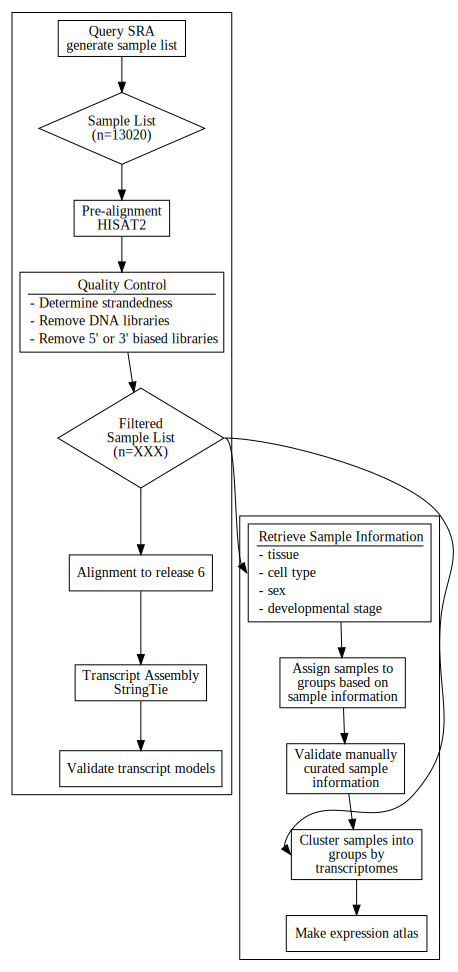

In [120]:
dot = Digraph(comment="NCBI Remap Project Workflow", filename='../../output/hisat2_workflow.svg', format='svg')

g1 = Digraph('cluster_0')

g1.node('A1', 'Query SRA\ngenerate sample list', shape='rectangle')

g1.node('B1', 'Sample List\n(n=13020)', shape='diamond')

g1.node('C1', 'Pre-alignment\nHISAT2', shape='rectangle')

g1.node('D1', '''<
<TABLE BORDER="0" CELLBORDER="0" CELLSPACING="0"> 
<TR><TD align="center" >Quality Control</TD></TR><HR/>
<TR><TD align="left">- Determine strandedness</TD></TR> 
<TR><TD align="left">- Remove DNA libraries</TD></TR> 
<TR><TD align="left">- Remove 5\' or 3\' biased libraries</TD></TR> 
</TABLE>>''', shape='rectangle')

g1.node('E1', 'Filtered\nSample List\n(n=XXX)', shape='diamond')

g1.node('F1', 'Alignment to release 6', shape='rectangle')

g1.node('G1', 'Transcript Assembly\nStringTie', shape='rectangle')

g1.node('H1', 'Validate transcript models', color='organge', shape='rectangle')


g1.edges([
        ('A1', 'B1'),
        ('B1', 'C1'),
        ('C1', 'D1'),
        ('D1', 'E1'),
        ('E1', 'F1'),
        ('F1', 'G1'),
        ('G1', 'H1')
    ])

g2 = Digraph('cluster_1')

g2.node('A2', '''<
<TABLE BORDER="0" CELLBORDER="0" CELLSPACING="0"> 
<TR><TD align="center" >Retrieve Sample Information</TD></TR><HR/>
<TR><TD align="left">- tissue</TD></TR> 
<TR><TD align="left">- cell type</TD></TR> 
<TR><TD align="left">- sex</TD></TR> 
<TR><TD align="left">- developmental stage</TD></TR> 
</TABLE>>''', shape='rectangle')

g2.node('B2', 'Assign samples to\ngroups based on\nsample information', shape='rectangle')
g2.node('C2', 'Validate manually\ncurated sample\ninformation', shape='rectangle')
g2.node('D2', 'Cluster samples into\ngroups by\ntranscriptomes', shape='rectangle')
g2.node('E2', 'Make expression atlas', shape='rectangle')

g2.edges([
        ('A2', 'B2'),
        ('B2', 'C2'),
        ('C2', 'D2'),
        ('D2', 'E2'),
    ])


dot.subgraph(g1)
dot.subgraph(g2)

dot.edge('E1', 'A2', tailport='e', headport='w')
dot.edge('E1', 'D2', tailport='e', headport='w')

dot

In [84]:
dot.edges?

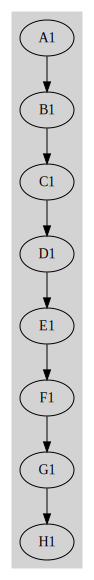

In [116]:
dot = Digraph('G', comment="NCBI Remap Project Workflow")

g1 = Digraph('cluster_2')
g1.body.append('style=filled')
g1.body.append('color=lightgrey')
g1.edges([
        ('A1', 'B1'),
        ('B1', 'C1'),
        ('C1', 'D1'),
        ('D1', 'E1'),
        ('E1', 'F1'),
        ('F1', 'G1'),
        ('G1', 'H1')
    ])

dot.subgraph(g1)


dot